In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv("./master_user_dataset_with_predictions.csv")
df.head()

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,spend_2024_q1,transactions_2024_q1,spend_2024_q2,transactions_2024_q2,spend_2024_q3,...,risk_adjusted_potential,is_segment_0,is_segment_1,segment0_spend,segment1_spend,high_income_cli_potential,prime_cli_candidate,high_income_seg0,high_tier_cli_potential,cli_recommendation_score
0,003T5pQCItIgtB3eiTHDhUQEac0aMiNz,30779.72,72.0,16705.00,104.0,0.00,0.0,0.00,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,009UZBOQTJzLpRuvrLRT6tnPDuWEwIHR,856.20,0.0,0.00,0.0,0.00,0.0,856.20,0.0,0.0,...,396.081692,0.0,1.0,0.0,372.958015,0.0,0.0,0.0,0.0,0.135237
2,00nff4IIkr2nuiprhmPNNX1mCKtbhLR9,4926.00,0.0,2879.82,0.0,900.00,0.0,762.00,0.0,1842.0,...,1937.214377,0.0,1.0,0.0,1984.967390,0.0,0.0,0.0,0.0,1.573498
3,01HxVXdVo5bSQzPwNYJGH9m6hIGdhHx4,6483.72,120.0,1225.50,6.0,0.00,0.0,0.00,0.0,580.5,...,2282.597277,0.0,1.0,0.0,2479.235974,0.0,0.0,0.0,0.0,0.714507
4,01JQvVz8oDo2m6lkE3TUbBPePrNK12n9,258521.70,1800.0,44441.52,258.0,1319.22,30.0,67150.68,624.0,108339.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing low income and high income

In [21]:
df.dtypes

user_id                        object
total_spend_2024              float64
total_transactions_2024       float64
total_spend_2025YTD           float64
total_transactions_2025YTD    float64
                               ...   
high_income_cli_potential     float64
prime_cli_candidate           float64
high_income_seg0              float64
high_tier_cli_potential       float64
cli_recommendation_score      float64
Length: 85, dtype: object

In [22]:
df.shape

(18033, 85)

In [23]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'spend_2024_q1',
       'transactions_2024_q1', 'spend_2024_q2', 'transactions_2024_q2',
       'spend_2024_q3', 'transactions_2024_q3', 'spend_2024_q4',
       'transactions_2024_q4', 'credit_line', 'current_balance',
       'behavior_score', 'credit_score', 'is_high_income', 'has_fraud',
       'fraud_transaction_count', 'fraud_transaction_sum', 'fraud_case_count',
       'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
 

In [24]:
df["economic_factor"].unique()

array([0.0231])

In [25]:
df_high_income = df[df["is_high_income"]==1]
df_low_income = df[df["is_high_income"]==0]

In [26]:
df_high_income.shape[0]

2999

In [27]:
df_low_income.shape[0]

15034

In [28]:
print("Metrics for high income accounts")
print(df_high_income.describe())

Metrics for high income accounts
       total_spend_2024  total_transactions_2024  total_spend_2025YTD  \
count      2.999000e+03              2999.000000         2.999000e+03   
mean       2.382043e+05              1768.552851         7.305803e+04   
std        2.291893e+05              1558.423465         6.781383e+04   
min        0.000000e+00                 0.000000        -6.720000e+02   
25%        6.710001e+04               453.000000         2.413615e+04   
50%        1.928805e+05              1530.000000         5.848305e+04   
75%        3.357720e+05              2658.000000         1.010778e+05   
max        3.117749e+06             10668.000000         1.004904e+06   

       total_transactions_2025YTD  spend_2024_q1  transactions_2024_q1  \
count                 2999.000000    2999.000000           2999.000000   
mean                   518.527509    4728.128393             39.353118   
std                    428.182621   10105.914449             45.800438   
min          

In [29]:
print("Metrics for low income accounts")
print(df_high_income.describe())

Metrics for low income accounts
       total_spend_2024  total_transactions_2024  total_spend_2025YTD  \
count      2.999000e+03              2999.000000         2.999000e+03   
mean       2.382043e+05              1768.552851         7.305803e+04   
std        2.291893e+05              1558.423465         6.781383e+04   
min        0.000000e+00                 0.000000        -6.720000e+02   
25%        6.710001e+04               453.000000         2.413615e+04   
50%        1.928805e+05              1530.000000         5.848305e+04   
75%        3.357720e+05              2658.000000         1.010778e+05   
max        3.117749e+06             10668.000000         1.004904e+06   

       total_transactions_2025YTD  spend_2024_q1  transactions_2024_q1  \
count                 2999.000000    2999.000000           2999.000000   
mean                   518.527509    4728.128393             39.353118   
std                    428.182621   10105.914449             45.800438   
min           

<Axes: xlabel='credit_score', ylabel='credit_line'>

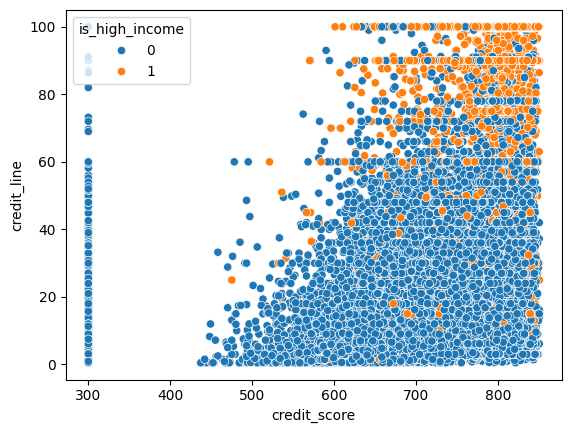

In [30]:
sns.scatterplot(x=df["credit_score"], y=df["credit_line"],hue=df["is_high_income"],data=df)

### Visualizing any delinquency vs no delinquency

In [31]:
df_delinquency = df[(df["payment_hist_1_12_delinquency_count"]>=1) | (df["payment_hist_13_24_delinquency_count"] >= 1)]
df_delinquency

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,spend_2024_q1,transactions_2024_q1,spend_2024_q2,transactions_2024_q2,spend_2024_q3,...,risk_adjusted_potential,is_segment_0,is_segment_1,segment0_spend,segment1_spend,high_income_cli_potential,prime_cli_candidate,high_income_seg0,high_tier_cli_potential,cli_recommendation_score
2,00nff4IIkr2nuiprhmPNNX1mCKtbhLR9,4926.00,0.0,2879.82,0.0,900.00,0.0,762.00,0.0,1842.00,...,1937.214377,0.0,1.0,0.000000,1984.967390,0.0,0.0,0.0,0.0,1.573498
5,01Nobl3RlhBFSEnzPvmtOljwulRyx2Vm,20762.64,228.0,2178.00,0.0,0.00,0.0,0.00,0.0,2704.74,...,6437.649012,0.0,1.0,0.000000,7841.923770,0.0,0.0,0.0,0.0,4.018826
6,01Z6a85Da3bHfqyqGrcj5egWx5d7ZpgV,3215.75,30.0,710.60,10.0,424.95,5.0,800.00,0.0,1206.20,...,1258.380043,0.0,1.0,0.000000,1256.016125,0.0,0.0,0.0,0.0,0.825053
8,025CwvzHRyvyvp3t9dSiNmQ4SLM2VxOX,5875.56,6.0,3390.00,0.0,0.00,0.0,0.00,0.0,0.00,...,2611.923860,1.0,0.0,2525.025977,0.000000,0.0,0.0,0.0,0.0,2.429609
11,02Kb4HWANwlEUWw4D5M67n1cmcJBjZcO,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17983,zmy7UYsS535z2HZ86r9ePz1j0dLSuVle,33258.06,276.0,3336.84,0.0,3347.34,36.0,7891.86,54.0,14563.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18000,zpPpTQFgwFpxzwcqlsn6qajubIBSea9x,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18002,zqJjuHDOxBG5Ok10iASANNSAO2atl2oQ,5713.38,54.0,480.00,0.0,0.00,0.0,0.00,0.0,3477.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18006,zs4eqbZgVHZOOXLrZsljI2YqBNDjNPq9,10025.82,54.0,1470.00,0.0,0.00,0.0,2514.00,0.0,4224.48,...,3454.520000,0.0,1.0,0.000000,3843.114152,0.0,0.0,0.0,0.0,4.749022


In [32]:
delinquency_ids = list(df_delinquency["user_id"].unique())
delinquency_ids

['00nff4IIkr2nuiprhmPNNX1mCKtbhLR9',
 '01Nobl3RlhBFSEnzPvmtOljwulRyx2Vm',
 '01Z6a85Da3bHfqyqGrcj5egWx5d7ZpgV',
 '025CwvzHRyvyvp3t9dSiNmQ4SLM2VxOX',
 '02Kb4HWANwlEUWw4D5M67n1cmcJBjZcO',
 '02OywcvCuzErDGruGrrnRd1WjoALOsqF',
 '02zeAgdyGwqYbhLGZj2qWzVsypbYbhtN',
 '04Fm8lvRPMdPdG1gk89ZevSCS3aPJnXu',
 '05NMIEekxFw1dkHIeYCTsIq9VWHtBpU3',
 '05uRi3iHpfkGz3YSFHJToU8F33N5beUV',
 '07yP8tCOFbgPge9LlGKvflTUholXK6rc',
 '08xujtJDtslhwVgFPOfqqcEqZS6FeU0O',
 '0ACb1dTQuobir58aChu3XNhTTiqNnPiS',
 '0AQKjzW3motpMDN0molABVuz6uPvziUE',
 '0AiaN1yFeQcDQ0iRR3L4vIeQC8lQC6cd',
 '0BRWXFsrC4bLJXP4Yp9fRqN1QLjiVOKw',
 '0DYJXQZs16BbPMlVQQJPRZbljKeMrS1V',
 '0Enu4DGuNegzjxK9t6cEeAWNsNYPsRl2',
 '0FWSFP0A0GBL4b3ZrCuZC5mgFbYwT9yw',
 '0It14qLeNtNF7GEyyoyl9EvV9q21V3dl',
 '0IwtsMNMM4Hf771ctBUthahCPp3XkMys',
 '0KmcGJBgUEQHv8QdCZiYHlhEi3l1b0MF',
 '0LvzeVMfPxZL3x9BNQLED9VFTJHukC5h',
 '0N9kck3KYASzFf1Wtmq5luRIkIPV4XsH',
 '0OHPlEbGgwABcRM8spkTerWdwmV7Q5iF',
 '0Q3IcmWY9Uc60KY1AML3heubXTDIP8YT',
 '0QjmN63zPxJJOvzN6ratvu0GwehmOpRp',
 

In [33]:
df_no_delinquency = df[~df["user_id"].isin(delinquency_ids)]
df_no_delinquency

,user_id,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,spend_2024_q1,transactions_2024_q1,spend_2024_q2,transactions_2024_q2,spend_2024_q3,...,risk_adjusted_potential,is_segment_0,is_segment_1,segment0_spend,segment1_spend,high_income_cli_potential,prime_cli_candidate,high_income_seg0,high_tier_cli_potential,cli_recommendation_score
0,003T5pQCItIgtB3eiTHDhUQEac0aMiNz,30779.72,72.0,16705.00,104.0,0.00,0.0,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,009UZBOQTJzLpRuvrLRT6tnPDuWEwIHR,856.20,0.0,0.00,0.0,0.00,0.0,856.20,0.0,0.00,...,396.081692,0.0,1.0,0.0,372.958015,0.0,0.0,0.0,0.0,0.135237
3,01HxVXdVo5bSQzPwNYJGH9m6hIGdhHx4,6483.72,120.0,1225.50,6.0,0.00,0.0,0.00,0.0,580.50,...,2282.597277,0.0,1.0,0.0,2479.235974,0.0,0.0,0.0,0.0,0.714507
4,01JQvVz8oDo2m6lkE3TUbBPePrNK12n9,258521.70,1800.0,44441.52,258.0,1319.22,30.0,67150.68,624.0,108339.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,01jTVGvvIys75zN5g3Uuu0DMOMNotK7M,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,32.645439,0.0,1.0,0.0,30.739563,0.0,0.0,0.0,0.0,0.010598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18027,zxshNeZeOg37Rppmpxxj7uv3lcA1n13Z,318781.38,2352.0,83816.10,606.0,4497.54,72.0,112193.10,810.0,108722.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18029,zy9F9S3yuMOaVnkBdjWIXvFq3abH9vOk,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18030,zyNkZYEiU8vpb3KmWW0xyjgSe1F9XpvA,5711.28,6.0,0.00,0.0,0.00,0.0,5711.28,6.0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18031,zzJCWP33DpvwT3PiXeOObpERJJWkOvYJ,142973.40,1075.0,34076.50,280.0,1531.70,10.0,43023.85,320.0,59217.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df_delinquency.describe()

,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,spend_2024_q1,transactions_2024_q1,spend_2024_q2,transactions_2024_q2,spend_2024_q3,transactions_2024_q3,...,risk_adjusted_potential,is_segment_0,is_segment_1,segment0_spend,segment1_spend,high_income_cli_potential,prime_cli_candidate,high_income_seg0,high_tier_cli_potential,cli_recommendation_score
count,2.919000e+03,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000,1161.000000
mean,2.828817e+04,157.050702,8151.487859,44.962316,566.865728,3.014731,9082.120819,45.506338,9317.023244,50.769442,...,10676.068886,0.172265,0.827735,5240.209170,6041.558463,9679.773935,0.017227,0.018949,2.248191,8.765705
std,7.762880e+04,455.374604,24468.727832,141.974034,3749.927122,12.004174,26561.405594,148.321021,28469.541395,155.221202,...,30630.389592,0.377774,0.377774,28395.240844,17687.890663,63528.929246,0.130171,0.136404,16.915669,25.357687
min,0.000000e+00,0.000000,-1567.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.157389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004906
25%,2.060390e+03,3.000000,211.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1171.045013,0.000000,1.000000,0.000000,31.882125,0.000000,0.000000,0.000000,0.000000,0.560426
50%,7.614000e+03,21.000000,1666.140000,4.000000,0.000000,0.000000,1620.000000,0.000000,1842.000000,6.000000,...,3185.290119,0.000000,1.000000,0.000000,1982.808016,0.000000,0.000000,0.000000,0.000000,2.284877
75%,2.077248e+04,90.000000,4390.290000,21.000000,0.000000,0.000000,5574.780000,24.000000,5516.040000,24.000000,...,7925.325342,0.000000,1.000000,0.000000,5594.785311,0.000000,0.000000,0.000000,0.000000,6.526355
max,1.654903e+06,5688.000000,356219.520000,1656.000000,102457.300000,154.000000,504907.680000,1794.000000,638006.460000,1884.000000,...,331141.389685,1.000000,1.000000,321820.290644,336871.995065,673743.990129,1.000000,1.000000,150.000000,350.620680


In [35]:
df_no_delinquency.describe()

,total_spend_2024,total_transactions_2024,total_spend_2025YTD,total_transactions_2025YTD,spend_2024_q1,transactions_2024_q1,spend_2024_q2,transactions_2024_q2,spend_2024_q3,transactions_2024_q3,...,risk_adjusted_potential,is_segment_0,is_segment_1,segment0_spend,segment1_spend,high_income_cli_potential,prime_cli_candidate,high_income_seg0,high_tier_cli_potential,cli_recommendation_score
count,1.511400e+04,15114.000000,1.511400e+04,15114.000000,15114.000000,15114.000000,1.511400e+04,15114.000000,15114.000000,15114.000000,...,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000,4.361000e+03,4361.000000,4361.000000,4361.000000,4361.000000
mean,5.517403e+04,388.252349,1.655681e+04,113.443695,1049.090241,8.540625,1.703614e+04,116.650655,18049.739363,124.695117,...,2.093450e+04,0.252006,0.747994,14290.653253,5835.679224,2.669477e+04,0.057556,0.057326,6.945523,16.455818
std,1.368176e+05,984.154303,4.130553e+04,279.973336,4837.095640,25.919618,4.647276e+04,318.388485,46637.561675,325.316959,...,6.513947e+04,0.434215,0.434215,60301.350247,21155.089691,1.233547e+05,0.232928,0.232492,29.206904,51.375402
min,0.000000e+00,0.000000,-4.936242e+04,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,2.663049e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.005309
25%,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,...,3.405348e+01,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.021739
50%,4.034400e+03,6.000000,1.159430e+03,1.000000,0.000000,0.000000,0.000000e+00,0.000000,450.000000,0.000000,...,2.695296e+03,0.000000,1.000000,0.000000,32.065403,0.000000e+00,0.000000,0.000000,0.000000,1.726735
75%,2.913395e+04,120.000000,8.399500e+03,36.000000,0.000000,0.000000,6.412433e+03,24.000000,7996.935000,30.000000,...,1.097334e+04,1.000000,1.000000,32.346473,4021.539474,0.000000e+00,0.000000,0.000000,0.000000,8.985039
max,3.117749e+06,10668.000000,1.004904e+06,3720.000000,132078.520000,357.000000,1.064035e+06,3264.000000,925361.640000,3438.000000,...,1.028856e+06,1.000000,1.000000,989496.630857,387399.136187,1.978993e+06,1.000000,1.000000,150.000000,852.974225


Text(0.5, 1.0, 'Credit Line for Accounts W/Delinquency in the Past 24mo')

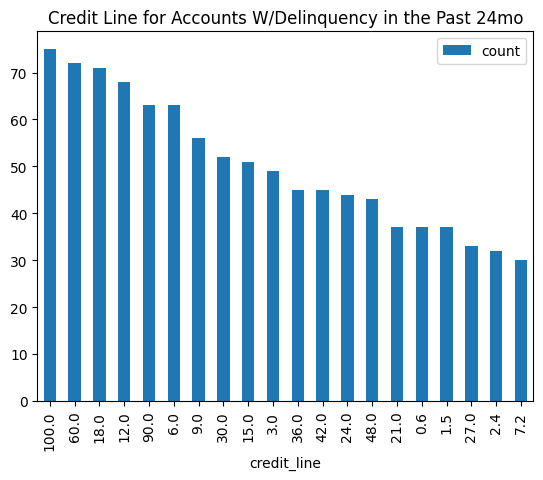

In [36]:
df_delinquency["credit_line"].value_counts(ascending=False).reset_index().head(20).plot.bar(x="credit_line",y="count")
plt.title("Credit Line for Accounts W/Delinquency in the Past 24mo")

Text(0.5, 1.0, 'Credit Line for Accounts W/No Delinquency in the Past 24mo')

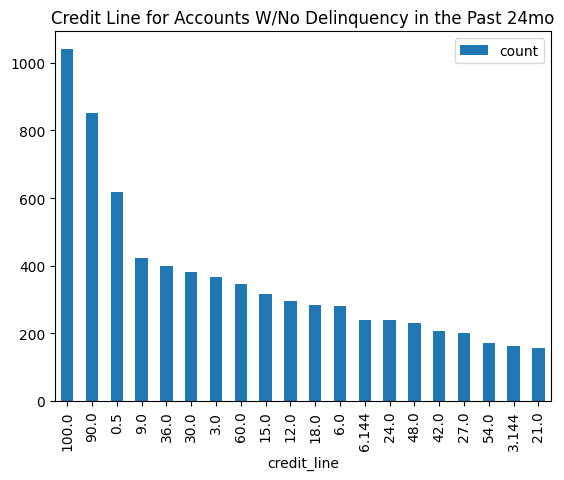

In [37]:
df_no_delinquency["credit_line"].value_counts(ascending=False).reset_index().head(20).plot.bar(x="credit_line",y="count")
plt.title("Credit Line for Accounts W/No Delinquency in the Past 24mo")

In [38]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'spend_2024_q1',
       'transactions_2024_q1', 'spend_2024_q2', 'transactions_2024_q2',
       'spend_2024_q3', 'transactions_2024_q3', 'spend_2024_q4',
       'transactions_2024_q4', 'credit_line', 'current_balance',
       'behavior_score', 'credit_score', 'is_high_income', 'has_fraud',
       'fraud_transaction_count', 'fraud_transaction_sum', 'fraud_case_count',
       'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
 

In [39]:
del_cols = ["payment_hist_1_12_max_delinquency","payment_hist_13_24_max_delinquency"]

In [40]:
df["payment_hist_13_24_max_delinquency"].unique()

array([0, 1, 2, 3, 5])

In [41]:
df["delinquency"] = ((df["payment_hist_1_12_max_delinquency"]>=1) | (df["payment_hist_13_24_max_delinquency"]>=1))*1
df["delinquency"]

0        0
1        0
2        1
3        0
4        0
        ..
18028    1
18029    0
18030    0
18031    0
18032    0
Name: delinquency, Length: 18033, dtype: int64

### Visualizing 

In [42]:
df.columns

Index(['user_id', 'total_spend_2024', 'total_transactions_2024',
       'total_spend_2025YTD', 'total_transactions_2025YTD', 'spend_2024_q1',
       'transactions_2024_q1', 'spend_2024_q2', 'transactions_2024_q2',
       'spend_2024_q3', 'transactions_2024_q3', 'spend_2024_q4',
       'transactions_2024_q4', 'credit_line', 'current_balance',
       'behavior_score', 'credit_score', 'is_high_income', 'has_fraud',
       'fraud_transaction_count', 'fraud_transaction_sum', 'fraud_case_count',
       'fraud_transaction_max', 'fraud_transaction_min',
       'fraud_transaction_avg', 'payment_hist_1_12_delinquency_count',
       'payment_hist_1_12_max_delinquency',
       'payment_hist_1_12_zero_balance_months',
       'payment_hist_1_12_credit_balance_months',
       'payment_hist_1_12_normal_months',
       'payment_hist_13_24_delinquency_count',
       'payment_hist_13_24_max_delinquency',
       'payment_hist_13_24_zero_balance_months',
       'payment_hist_13_24_credit_balance_months',
 

<Axes: xlabel='credit_score', ylabel='credit_line'>

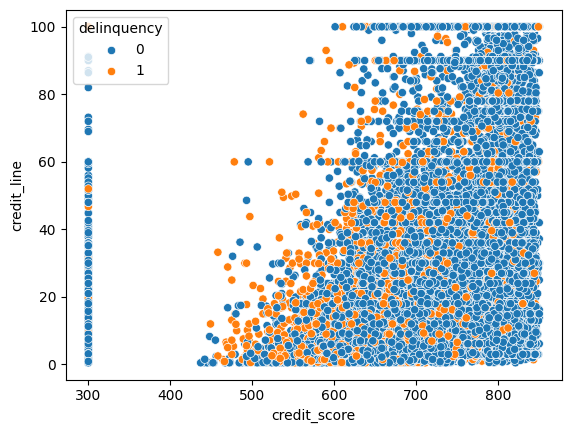

In [43]:
sns.scatterplot(x=df["credit_score"], y=df["credit_line"],hue=df["delinquency"],data=df)

In [45]:
print("Variable correlations with 'total_spend_2025YTD'")
print(df.select_dtypes(include=['float64', 'int64']).corrwith(df['total_spend_2025YTD']))

Variable correlations with 'total_spend_2025YTD'
total_spend_2024              0.872850
total_transactions_2024       0.762678
total_spend_2025YTD           1.000000
total_transactions_2025YTD    0.808712
spend_2024_q1                 0.478806
                                ...   
prime_cli_candidate           0.671575
high_income_seg0              0.724782
high_tier_cli_potential       0.759450
cli_recommendation_score      0.795868
delinquency                  -0.078986
Length: 85, dtype: float64


c:\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3045: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Python312\Lib\site-packages\numpy\lib\_function_base_impl.py:3046: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
